In [1]:
# install geopandas: conda install -c conda-forge geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import sas7bdat
import re

In [2]:
fpzip='E:\Team_Data\cb_2017_us_zcta510_500k\cb_2017_us_zcta510_500k.shp'
fpcounty='E:\Team_Data\cb_2017_us_county_500k\cb_2017_us_county_500k.shp'

In [3]:
data=gpd.read_file(fpzip)
ctdata=gpd.read_file(fpcounty)

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [5]:
# Get all NC Zipcode
NC_zip=set(pd.read_csv(r'E:\Bootcamp_Summer_Project\CSVexport\NC\ACS_16_5YR_S0101.csv',dtype={'Zip':str})['Zip'])
MA_zip=set(pd.read_csv(r'E:\Bootcamp_Summer_Project\CSVexport\MA\ACS_16_5YR_S0101.csv',dtype={'Zip':str})['Zip'])
#OR_zip=set(pd.read_csv(r'E:\Bootcamp_Summer_Project\CSVexport\OR\ACS_16_5YR_S1201.csv',dtype={'Zip':str})['Zip'])

OR_zip=set(sas7bdat.SAS7BDAT(r'E:\Bootcamp_Summer_Project\Original_Data\Data\OR\acs_16_5yr_b02001_with_ann2.sas7bdat').to_data_frame()['Zip'])
#sasdf=sas7bdat.SAS7BDAT(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\Original_Data\Data\rx_records_trx.sas7bdat').to_data_frame()

print(len(NC_zip),len(MA_zip),len(OR_zip))

829 547 431


In [6]:
# slice by zip code list
#data['ZCTA5CE10'].isin(['71973','95445'])
nc_data=data[data['ZCTA5CE10'].isin(NC_zip)]
ma_data=data[data['ZCTA5CE10'].isin(MA_zip)]
or_data=data[data['ZCTA5CE10'].isin(OR_zip)]
nc_data.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
46,28306,8600000US28306,28306,177888344,2457841,"(POLYGON ((-78.85736199999999 34.91124, -78.85..."
187,28334,8600000US28334,28334,414866754,3998968,"POLYGON ((-78.735461 35.175001, -78.7338379999..."
188,28169,8600000US28169,28169,1450978,0,"POLYGON ((-81.437867 35.357039, -81.4360339999..."
189,27278,8600000US27278,27278,262556156,2234207,"POLYGON ((-79.20634699999999 35.988683, -79.20..."
190,28325,8600000US28325,28325,2203868,0,"POLYGON ((-78.114893 35.153641, -78.1127 35.15..."


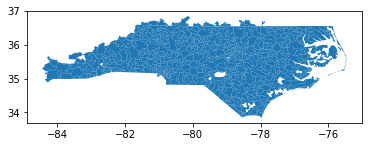

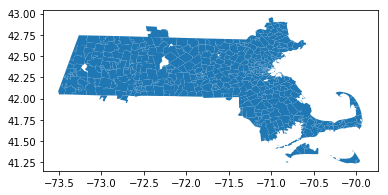

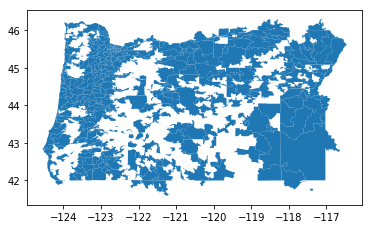

In [7]:
nc_data.plot()
ma_data.plot()
or_data.plot()
plt.show()

In [8]:
NC_census_df=pd.read_csv(r'E:\Bootcamp_Summer_Project\CSVexport\NC\ACS_16_5YR_S0101.csv',dtype={'Zip':str})
NC_census_df.head()

,Unnamed: 0,Zip,HC01_EST_VC01:Total; Estimate; Total population,HC02_EST_VC01:Male; Estimate; Total population,HC03_EST_VC01:Female; Estimate; Total population,HC01_EST_VC03:Total; Estimate; AGE - Under 5 years,HC02_EST_VC03:Male; Estimate; AGE - Under 5 years,HC03_EST_VC03:Female; Estimate; AGE - Under 5 years,HC01_EST_VC04:Total; Estimate; AGE - 5 to 9 years,HC02_EST_VC04:Male; Estimate; AGE - 5 to 9 years,...,HC03_EST_VC38:Female; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,HC01_EST_VC39:Total; Estimate; SUMMARY INDICATORS - Child dependency ratio,HC02_EST_VC39:Male; Estimate; SUMMARY INDICATORS - Child dependency ratio,HC03_EST_VC39:Female; Estimate; SUMMARY INDICATORS - Child dependency ratio,HC01_EST_VC42:Total; Estimate; PERCENT ALLOCATED - Sex,HC02_EST_VC42:Male; Estimate; PERCENT ALLOCATED - Sex,HC03_EST_VC42:Female; Estimate; PERCENT ALLOCATED - Sex,HC01_EST_VC43:Total; Estimate; PERCENT ALLOCATED - Age,HC02_EST_VC43:Male; Estimate; PERCENT ALLOCATED - Age,HC03_EST_VC43:Female; Estimate; PERCENT ALLOCATED - Age
0,0,23893,140,46,94,0,0,0,0,0,...,(X),16.7,(X),(X),0,(X),(X),0,(X),(X)
1,1,23917,3097,1777,1320,1.6,1.2,2.3,6.4,7.7,...,(X),23.6,(X),(X),0,(X),(X),0.8,(X),(X)
2,2,23927,4005,1957,2048,3.3,5.4,1.4,3.9,6.9,...,(X),25.6,(X),(X),0.1,(X),(X),1.5,(X),(X)
3,3,24053,2879,1488,1391,3.4,6.6,0,3.7,4.8,...,(X),30.6,(X),(X),0,(X),(X),0,(X),(X)
4,4,24069,1939,964,975,4.9,1.2,8.5,5.6,7,...,(X),30.1,(X),(X),0,(X),(X),0,(X),(X)


In [9]:
nc_pop_df=NC_census_df.iloc[:,1:3]

In [10]:
nc_pop_df.columns=['zip', 'pop']
nc_pop_df.head()

,zip,pop
0,23893,140
1,23917,3097
2,23927,4005
3,24053,2879
4,24069,1939


In [11]:
nc_data.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
46,28306,8600000US28306,28306,177888344,2457841,"(POLYGON ((-78.85736199999999 34.91124, -78.85..."
187,28334,8600000US28334,28334,414866754,3998968,"POLYGON ((-78.735461 35.175001, -78.7338379999..."
188,28169,8600000US28169,28169,1450978,0,"POLYGON ((-81.437867 35.357039, -81.4360339999..."
189,27278,8600000US27278,27278,262556156,2234207,"POLYGON ((-79.20634699999999 35.988683, -79.20..."
190,28325,8600000US28325,28325,2203868,0,"POLYGON ((-78.114893 35.153641, -78.1127 35.15..."


In [12]:
new_nc_data=nc_data.merge(nc_pop_df, left_on='ZCTA5CE10', right_on='zip')

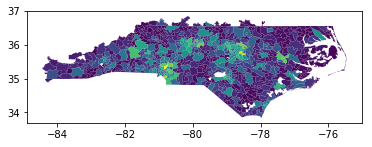

In [13]:
new_nc_data.plot(column='pop')
plt.show()

In [14]:
zip_df=pd.read_csv('E:\Team_Data\zip_code_database.csv')

In [15]:
len(set(zip_df[zip_df['state']=='NC']['county']))

100

In [16]:
trx_detail_df=sas7bdat.SAS7BDAT(r'E:\Bootcamp_Summer_Project\Original_Data - Rename Files\Data\AllData\rx_records_trx_details.sas7bdat').to_data_frame()

In [17]:
trx_detail_df.head()

,PG,PG_Name,Product_Description,Mfr_num,Mfr_Name,Dollars,Product_Basename,city,ST,Zip,Specialty,Total_trx
0,41.0,ARYMO ER TAB SA FC 15MG,"ARYMO ER,TAB SA FC,15MG,100 0111-11 ...",28362.0,EGALET,432.00,ARYMO,CHARLOTTE,NC,28203,06NRP,1.002
1,41.0,ARYMO ER TAB SA FC 15MG,"ARYMO ER,TAB SA FC,15MG,100 0111-11 ...",28362.0,EGALET,432.00,ARYMO,FAYETTEVILLE,NC,28304,01PMD,2.115
2,41.0,ARYMO ER TAB SA FC 15MG,"ARYMO ER,TAB SA FC,15MG,100 0111-11 ...",28362.0,EGALET,432.00,ARYMO,RALEIGH,NC,27614,06NRP,1.071
3,41.0,ARYMO ER TAB SA FC 15MG,"ARYMO ER,TAB SA FC,15MG,100 0111-11 ...",28362.0,EGALET,432.00,ARYMO,FAYETTEVILLE,NC,28304,07PHA,2.930
4,41.0,ARYMO ER TAB SA FC 15MG,"ARYMO ER,TAB SA FC,15MG,100 0111-11 ...",28362.0,EGALET,432.00,ARYMO,OXFORD,NC,27565,01PM,2.009


# County Map

In [18]:
nc_result_county=pd.read_csv(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\nc_result.csv')
or_result_county=pd.read_csv(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\or_result.csv')
ma_result_county=pd.read_csv(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\ma_result.csv')

In [19]:
nc_result_county.head()

,Unnamed: 0,county,total,pop,rate,state
0,0,Alamance County,33269.979,163481.0,0.203510,NC
1,1,Alexander County,978.370,37075.0,0.026389,NC
2,2,Alleghany County,1840.302,11324.0,0.162513,NC
3,3,Anson County,858.107,25970.0,0.033042,NC
4,4,Ashe County,4316.006,27646.0,0.156117,NC


In [20]:
len(nc_result_county['county'])

99

In [21]:
nc_result_county['ct']=nc_result_county['county'].apply(lambda x: re.findall(r'(.+) County',x)[0])
or_result_county['ct']=or_result_county['county'].apply(lambda x: re.findall(r'(.+) County',x)[0])
ma_result_county['ct']=ma_result_county['county'].apply(lambda x: re.findall(r'(.+) County',x)[0])

In [22]:
#NC	37	NORTH CAROLINA
#OR	41	OREGON
#MA	25	MASSACHUSETTS

ncdata=ctdata[ctdata['STATEFP']=='37']
ordata=ctdata[ctdata['STATEFP']=='41']
madata=ctdata[ctdata['STATEFP']=='25']

In [23]:
or_result_county

,Unnamed: 0,county,total,pop,rate,state,ct
0,0,Baker County,8097.882,16023,0.505391,OR,Baker
1,1,Benton County,56569.522,79509,0.711486,OR,Benton
2,2,Clackamas County,131083.178,388556,0.337360,OR,Clackamas
3,3,Clatsop County,18714.544,36889,0.507320,OR,Clatsop
4,4,Columbia County,8357.495,50870,0.164291,OR,Columbia
5,5,Coos County,27879.320,62967,0.442761,OR,Coos
6,6,Crook County,3557.756,21027,0.169199,OR,Crook
7,7,Curry County,10950.955,22364,0.489669,OR,Curry
8,8,Deschutes County,79418.201,169802,0.467711,OR,Deschutes
9,9,Douglas County,41930.592,106988,0.391919,OR,Douglas


In [24]:
ordata['NAME']

190          Baker
191        Gilliam
192        Klamath
193           Lane
194           Linn
195        Malheur
196      Multnomah
559        Clatsop
560      Deschutes
561        Douglas
797          Curry
857         Benton
911      Jefferson
912         Marion
988          Grant
1516          Coos
1524        Harney
1525    Hood River
1526        Morrow
1534      Umatilla
2092      Columbia
2100       Yamhill
2449       Jackson
2459       Lincoln
2460          Polk
2618       Wallowa
2669       Wheeler
2852          Lake
2861     Tillamook
2877         Crook
2902    Washington
2972     Clackamas
3038     Josephine
3039         Union
3160       Sherman
3195         Wasco
Name: NAME, dtype: object

In [25]:
ncctdata_all=ncdata.merge(nc_result_county[['ct','pop','total','rate']], left_on='NAME',right_on='ct',how='right')
orctdata_all=ordata.merge(or_result_county[['ct','pop','total','rate']], left_on='NAME',right_on='ct',how='right')
mactdata_all=madata.merge(ma_result_county[['ct','pop','total','rate']], left_on='NAME',right_on='ct',how='right')

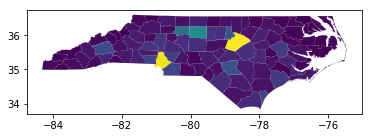

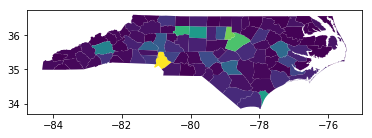

In [26]:
ncctdata_all.plot(column='pop')
ncctdata_all.plot(column='total')
plt.show()

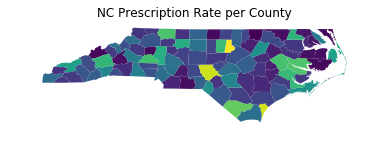

In [27]:
#plt.figure(figsize=(8,6))
ncctdata_all.plot(column='rate')
plt.title('NC Prescription Rate per County')
plt.axis('off')
plt.rcParams["figure.figsize"] = [800,600]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [29]:
ncdata

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
166,37,027,01008541,0500000US37027,37027,Caldwell,06,1222192511,7038401,"POLYGON ((-81.81051599999999 36.111511, -81.77..."
167,37,039,01008545,0500000US37039,37039,Cherokee,06,1179401584,29257527,"POLYGON ((-84.3174907933753 35.0218441647982, ..."
168,37,049,01026123,0500000US37049,37049,Craven,06,1830335129,172457083,"POLYGON ((-77.473294 35.231064, -77.465616 35...."
169,37,055,01026133,0500000US37055,37055,Dare,06,992522471,3000549341,"(POLYGON ((-75.72680699999999 35.935844, -75.7..."
170,37,059,01008549,0500000US37059,37059,Davie,06,682967799,7399100,"POLYGON ((-80.707629 35.855593, -80.7065549999..."
171,37,093,01008563,0500000US37093,37093,Hoke,06,1010380313,3981006,"POLYGON ((-79.45791899999999 35.044561, -79.45..."
172,37,103,01026338,0500000US37103,37103,Jones,06,1220837016,6031827,"POLYGON ((-77.731026 35.008138, -77.678797 35...."
173,37,111,01025836,0500000US37111,37111,McDowell,06,1139478112,13977177,POLYGON ((-82.29372499999999 35.68683499999999...
174,37,117,01026328,0500000US37117,37117,Martin,06,1182135018,746610,"POLYGON ((-77.402614 36.004966, -77.3847619999..."
175,37,119,01008570,0500000US37119,37119,Mecklenburg,06,1356030322,56685361,"POLYGON ((-81.05802899999999 35.07319, -81.057..."


In [ ]:
#plt.figure(figsize=(8,6))
madata.plot()
#plt.title('OR Prescription Rate per County')
#plt.axis('off')
#plt.rcParams["figure.figsize"] = [800,600]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\OR Rate.png',dpi=100)
plt.show()

In [ ]:
#plt.figure(figsize=(8,6))
orctdata_all.plot(column='rate')
plt.title('OR Prescription Rate per County')
plt.axis('off')
#plt.rcParams["figure.figsize"] = [800,600]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\OR Rate.png',dpi=100)
plt.show()

In [1]:
#plt.figure(figsize=(8,6))
ncctdata_all.plot(column='rate')
plt.title('NC Prescription Rate per County')
plt.axis('off')
plt.rcParams["figure.figsize"] = [800,600]
#plt.savefig("test.png", bbox_inches='tight')
plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

NameError: name 'ncctdata_all' is not defined